# Sentiment Analysis of Financial News Headlines
## This task is going to apply NLP techniques to classify a news headline containing financial information into either one of the sentiments (Positive, Negative or Neutral)

### Dataset:
https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

### Steps
- 1. Download the dataset
- 2. Load the dataset
- 3. Explore the dataset (Exploratory Data Analysis)
- 4. Clean the data
- 5. Apply SMOTE for imbalanced data 
- 6. Build a BoW model
- 7. Build a Tf-Idf model
- 8. Split train and test data
- 9. Use one ML Classifying algorithm to classify the finanical news headline data
- 10. Use another ML classifying algorithm to classify them
- 11. Plot Confusion matrix 

## 1. Download the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

## 2. Load the dataset

In [2]:
data = pd.read_csv("financial_news_headlines_sentiment.csv", encoding='latin1', names=["label", "text"])

## 3. Explore the dataset

In [3]:
data.head(10)

,label,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
5,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
6,positive,"For the last quarter of 2010 , Componenta 's n..."
7,positive,"In the third quarter of 2010 , net sales incre..."
8,positive,Operating profit rose to EUR 13.1 mn from EUR ...
9,positive,"Operating profit totalled EUR 21.1 mn , up fro..."


In [4]:
data.isna().sum()

label    0
text     0
dtype: int64

In [5]:
data.describe()

,label,text
count,4846,4846
unique,3,4838
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2879,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   4846 non-null   object
 1   text    4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [7]:
class_distribution = data['label'].value_counts()

class_distribution

label
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64

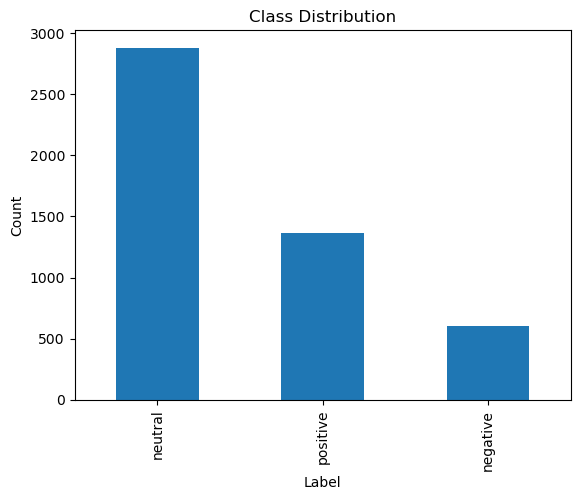

In [8]:
data['label'].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [9]:
# Assuming 'data' is your DataFrame
duplicated_rows = data.duplicated()

# Display rows that are duplicated
duplicated_data = data[duplicated_rows]
print("Duplicated Rows:")
print(duplicated_data)

# Count the number of duplicated rows
num_duplicated_rows = duplicated_data.shape[0]
print(f"Number of Duplicated Rows: {num_duplicated_rows}")

Duplicated Rows:
        label                                               text
1099  neutral  The issuer is solely responsible for the conte...
1416  neutral  The report profiles 614 companies including ma...
2396  neutral  Ahlstrom 's share is quoted on the NASDAQ OMX ...
2567  neutral  SSH Communications Security Corporation is hea...
3094  neutral  Proha Plc ( Euronext :7327 ) announced today (...
3206  neutral  The company serves customers in various indust...
Number of Duplicated Rows: 6


In [10]:
data.shape

(4846, 2)

## 4. Clean the data

In [11]:
data = data.drop_duplicates()

In [12]:
data.shape

(4840, 2)

In [13]:
# Assuming 'data' is your DataFrame with a 'text' column
text_data = data['text']

# Function to clean text data
def clean_text(text):
    # Remove unwanted characters, numbers, and symbols
    text = re.sub(r'[^A-Za-z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Remove words with length 1
    text = ' '.join([word for word in text.split() if len(word) > 1])
    return text

# Apply the clean_text function to each text in the 'text' column
text_data = text_data.apply(clean_text)

In [14]:
data['text']= text_data

In [15]:
data.head()

,label,text
0,neutral,according gran company plans production russia...
1,neutral,technopolis plans develop stages area square m...
2,negative,international electronic industry company elco...
3,positive,new production plant company increase capacity...
4,positive,according company updated strategy years baswa...


## 5. SMOTE (Imbalanced dataset) 
Hint: Use **imblearn** library

In [16]:
# SMOTE Method is applied after Split train test data

## 6. BoW model

In [17]:
# Assuming 'data' is your DataFrame with a 'text' column
text_data = data['text']

# Create the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
bow_matrix = vectorizer.fit_transform(text_data)

# Convert the matrix to a DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the resulting DataFrame
bow_df.head()

,aaland,aalborg,aalto,aaltonen,aaron,aava,aazhang,ab,abb,abbott,...,zero,zgody,zinc,zip,zloty,zoltan,zone,zoo,zte,zu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 7. Tf-idf model

In [18]:
text_data = data['text']

# Create the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text data
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Convert the matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the resulting DataFrame
tfidf_df.head()

,aaland,aalborg,aalto,aaltonen,aaron,aava,aazhang,ab,abb,abbott,...,zero,zgody,zinc,zip,zloty,zoltan,zone,zoo,zte,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 8. Split train test data [3 points]

In [19]:
# BoW model
X_b = bow_df  # Features (BoW matrix)
y = data['label']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y, test_size=0.2, random_state=42)

In [20]:
print(X_train_b.shape, y_train_b.shape)

(3872, 8800) (3872,)


In [21]:
# SMOTE (Imbalanced dataset) 
# Apply SMOTE to balance the classes
smote_b = SMOTE(random_state=42)
X_train_b, y_train_b = smote_b.fit_resample(X_train_b, y_train_b)

In [22]:
print(X_train_b.shape, y_train_b.shape)

(6930, 8800) (6930,)


In [23]:
class_distribution = y_train_b.value_counts()
class_distribution

label
negative    2310
neutral     2310
positive    2310
Name: count, dtype: int64

In [24]:
# TF-IDF Model
X = tfidf_matrix  # Features (TF-IDF matrix)
y = data['label']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 9. Classification Algorithm
- Train
- Predict

In [26]:
# BoW Model
# Create a Multinomial Naive Bayes classifier
classifier_nb_b = MultinomialNB()

# Train the classifier on the training data
classifier_nb_b.fit(X_train_b, y_train_b)

# Make predictions on the test data
y_pred_nb_b = classifier_nb_b.predict(X_test_b)

# Evaluate the performance
accuracy = accuracy_score(y_test_b, y_pred_nb_b)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test_b, y_pred_nb_b))

Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

    negative       0.47      0.64      0.54       118
     neutral       0.79      0.79      0.79       563
    positive       0.58      0.50      0.53       287

    accuracy                           0.68       968
   macro avg       0.61      0.64      0.62       968
weighted avg       0.69      0.68      0.68       968



In [28]:
# TF-IDF Model
# Create a Multinomial Naive Bayes classifier
classifier_nb = MultinomialNB()

# Train the classifier on the training data
classifier_nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nb = classifier_nb.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.04      0.08       118
     neutral       0.68      0.97      0.80       563
    positive       0.65      0.35      0.46       287

    accuracy                           0.68       968
   macro avg       0.78      0.46      0.45       968
weighted avg       0.71      0.68      0.61       968



## 10. Another Classification Algorithm
- Train
- Predict

In [30]:
# Bow Model
# Create a Linear Support Vector Classification (LinearSVC) classifier
classifier_svm_b = LinearSVC()

# Train the classifier on the training data
classifier_svm_b.fit(X_train_b, y_train_b)

# Make predictions on the test data
y_pred_svm_b = classifier_svm_b.predict(X_test_b)

# Evaluate the performance
accuracy_svm = accuracy_score(y_test_b, y_pred_svm_b)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

# Display classification report for SVM
print("SVM Classification Report:")
print(classification_report(y_test_b, y_pred_svm_b))

SVM Accuracy: 0.66
SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.43      0.59      0.50       118
     neutral       0.78      0.73      0.75       563
    positive       0.58      0.57      0.57       287

    accuracy                           0.66       968
   macro avg       0.60      0.63      0.61       968
weighted avg       0.68      0.66      0.67       968



In [31]:
# TF-IDF Model
# Create a Linear Support Vector Classification (LinearSVC) classifier
classifier_svm = LinearSVC()

# Train the classifier on the training data
classifier_svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = classifier_svm.predict(X_test)

# Evaluate the performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

# Display classification report for SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.74
SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.76      0.49      0.60       118
     neutral       0.75      0.92      0.82       563
    positive       0.72      0.51      0.60       287

    accuracy                           0.74       968
   macro avg       0.74      0.64      0.67       968
weighted avg       0.74      0.74      0.73       968



## 11. Confusion Matrixes for two classification algorithms and two feature extractor methods

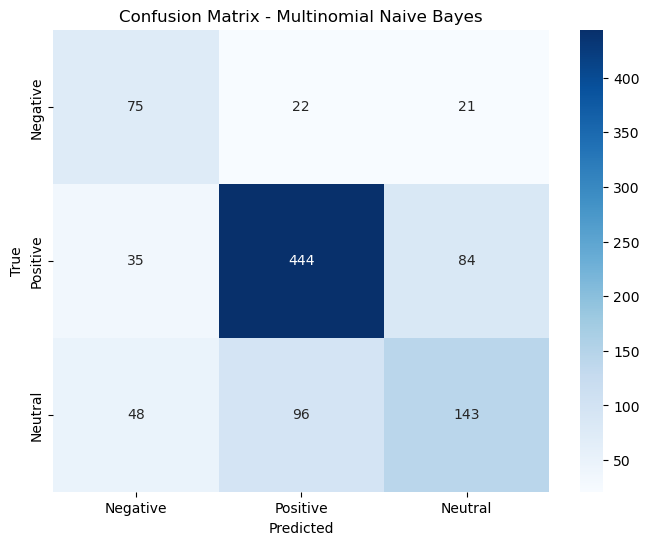

In [32]:
# MultinomialNB Model + BoW Model
# Create a confusion matrix
cm_nb_b = confusion_matrix(y_test_b, y_pred_nb_b)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_b, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

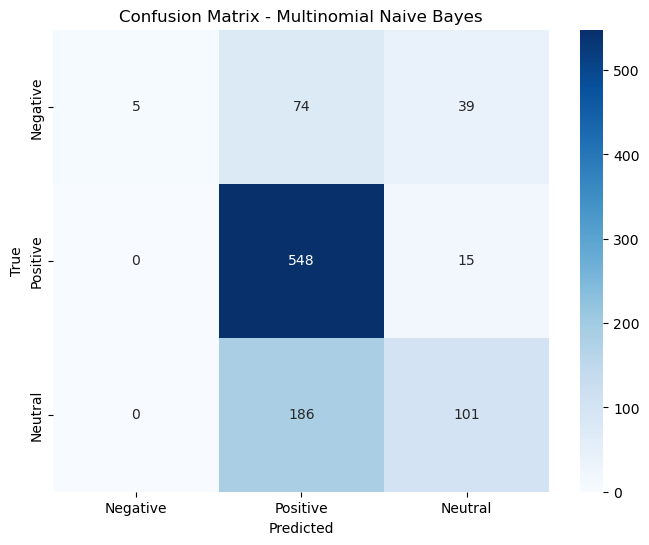

In [33]:
# MultinomialNB Model + TF-IDF Model
# Create a confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

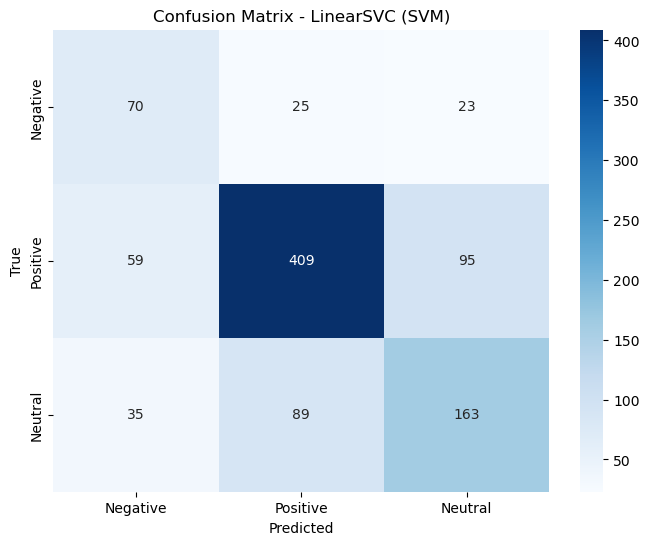

In [34]:
# SVM Model + BoW Model
# Create a confusion matrix for SVM
cm_svm_b = confusion_matrix(y_test_b, y_pred_svm_b)

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_b, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.title('Confusion Matrix - LinearSVC (SVM)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

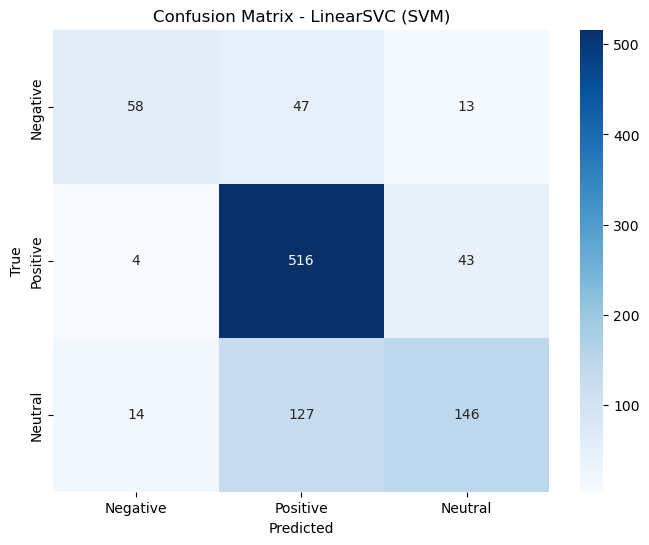

In [35]:
# SVM Model + TF-IDF Model
# Create a confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.title('Confusion Matrix - LinearSVC (SVM)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()